# MatPlotLib

Python has no default plotting library, but there are several packages one can use. [MatPlotLib](https://matplotlib.org/stable/users/history.html) is by far the most popular, and was originally designed to emulate the MATLAB syntax (hence the name). It has many features, and the documentation is quite thorough, but it is difficult to search for beginners. If you are struggling to do something, try doing a google search or finding a relevant Stack Exchange post. 

Since it is a package, it must be imported. The most used *module* in MatPlotLib is PyPlot. Jupyter notebooks also have some special commands that integrate matplotlib plots nicely. For now, you don't need to know the difference between a package and a module, or what a magic command is. All you need now, is the following two lines of code to begin plotting.

In [1]:
# this is a Jupyter "Magic Command"
%matplotlib inline
# This is the most common way to import matplotlib.
import matplotlib.pyplot as plt 

I personally like to change the default font size to be larger. You can run the following cell at any time to do this. You will need to rerun the plotting cells after this cell has been ran in order for the changes to take effect.

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 24})

Here is an example of the kinds of things you can do with MatPlotLib.

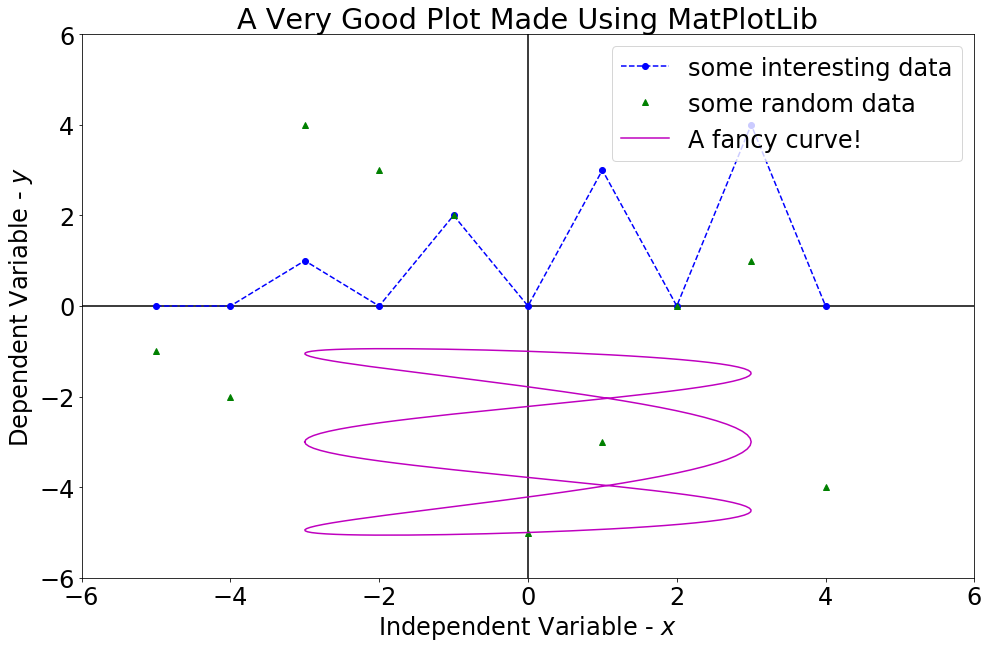

In [3]:
# make some data - don't worry about these lines
xs = list( range(-5, 5) )
import itertools
ys = list(itertools.chain.from_iterable(zip(range(5), [0]*5)))
import random
zs = list(range(-5, 5))
random.shuffle(zs)

import numpy as np
theta = np.linspace(-np.pi, np.pi, 201)

# plot the data
plt.figure(figsize=(16, 10)) # this is unecessary unless you want to control the size of the figure (and for some more complicated things)

# I sometimes like to make axes for my plots. These lines will do that. you may need to change the numbers to get the axes to extend farther.
plt.plot([-20, 20], [0,0], 'k-')
plt.plot([0,0], [-20, 20], 'k-')

# The actual data plotting. These are the only strictly necessary lines. 
plt.plot(xs, ys, 'bo--', label='some interesting data')
plt.plot(xs, zs, 'g^', label='some random data')
plt.plot(3*np.cos(3*theta), (2+.5*np.cos(theta))*np.sin(theta)-3, 'm-', label='A fancy curve!')

# change the window to fit the data. We only need this because the axes are much larger than the window that fits the data.
plt.xlim(-6, 6)
plt.ylim(-6, 6)

# add a legend
plt.legend()

# some nice labels
plt.title('A Very Good Plot Made Using MatPlotLib')
plt.xlabel('Independent Variable - $x$')
plt.ylabel('Dependent Variable - $y$')
plt.show()

Take a moment to browse the [gallery](https://matplotlib.org/stable/gallery/index.html).

### Q1
What kind data are you interested in? What kinds of plots do you see in the gallery that would be the best way to represent that data?

# The Basics

The most important lines in a plotting script are calls to the `plt.plot` function. It is important to understand how to use this function. There are several different ways to use it. We'll start with the simplest and work our way up. When we make a function call, such as `plt.plot(xs, ys)` we call the inputs to the function *arguments*. That function call had two arguments: `xs` and `ys`. This function call `plt.plot(xs, ys, 'bo-')` has three arguments: `xs`, `ys`, and the string `'bo-'`. The function `plt.plot` can accept different numbers of arguments. 

## One Argument

When given a single argument, the function `plt.plot` will assume that the argument is a list of $y$-values (the vertical axis) and use the index as the $x$-value.

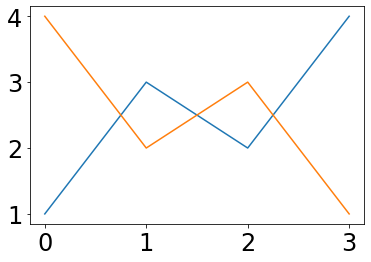

In [4]:
list1 = [1, 3, 2, 4]

plt.plot(list1) # the function is called with one argument - a list of data

list1_reversed = list1[::-1]

plt.plot(list1_reversed) # calling the function multiple times before plt.show() will plot multiple curves in the same figure.

plt.show()

Notice it draws lines between each point $(x,y)$ where $x$ goes from 0 to 3 (the index) and $y$ comes from `list1`.

## Two Arguments

When given two arguments, it treats the first argument as $x$-values and the second argument as $y$-values. Each argument can be a tuple, list, or Numpy array, but they must be of the same length.

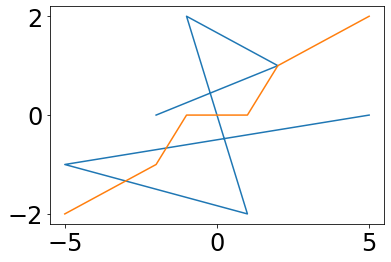

In [5]:
xs = [-2, 2, -1, 1, -5, 5]
ys = [0, 1, 2, -2, -1, 0]
plt.plot(xs, ys)
plt.plot(sorted(xs), sorted(ys)) #same values, but in a different order.
plt.show()

Notice that it draws straight lines between the $(x,y)$ points given. The order of the $x$-values and $y$-values matters!

## Three Arguments

If you use one or two arguments, all data will be plotted as solid lines connecting the data points, and it will cycle through some default colors for each individual function call. The third argument is a string that specifies the style and color to be used. See [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#codecell9) for a complete list of formats and colors available. Other markers and colors are possible, though it takes a bit more work. Here are some examples.

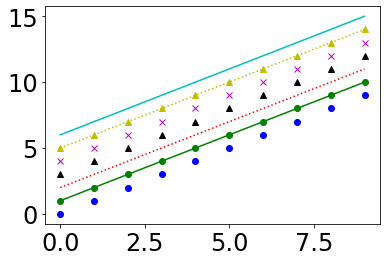

In [6]:
xs = list(range(10))

plt.plot(xs, [x+0 for x in xs], 'bo')
plt.plot(xs, [x+1 for x in xs], 'go-')
plt.plot(xs, [x+2 for x in xs], 'r:')
plt.plot(xs, [x+3 for x in xs], 'k^')
plt.plot(xs, [x+4 for x in xs], 'mx')
plt.plot(xs, [x+5 for x in xs], 'y^:')
plt.plot(xs, [x+6 for x in xs], 'c-')
plt.show()

### Keyword Arguments

`plt.plot` also accepts [keyword arguments](https://www.w3schools.com/python/gloss_python_function_keyword_arguments.asp). See the following examples to get a feel. See [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#codecell8) for a full list of named arguments.

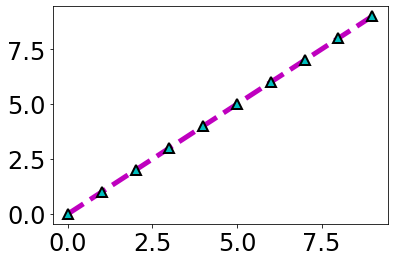

In [7]:
xs = list(range(10))
ys = xs.copy()

plt.plot(xs, ys, marker='^', markersize=10, markerfacecolor='c', markeredgecolor='k', markeredgewidth=2, linewidth=5, color='m', linestyle='--')
# xs and ys are not keyword arguments, but the rest are. Keyword arguments must occur AFTER the non-keyword arguments.

plt.show()

# Other Plotting Functions

`plt.plot` is a powerful plotting function, but MatPlotLib has others that are useful in specific circumstances. The [PyPlot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) lists all of them, but they are mixed in with other functions, so it can be difficult to find others by browsing. Here we demonstrate a few that might be helpful.

### Scatter Plot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


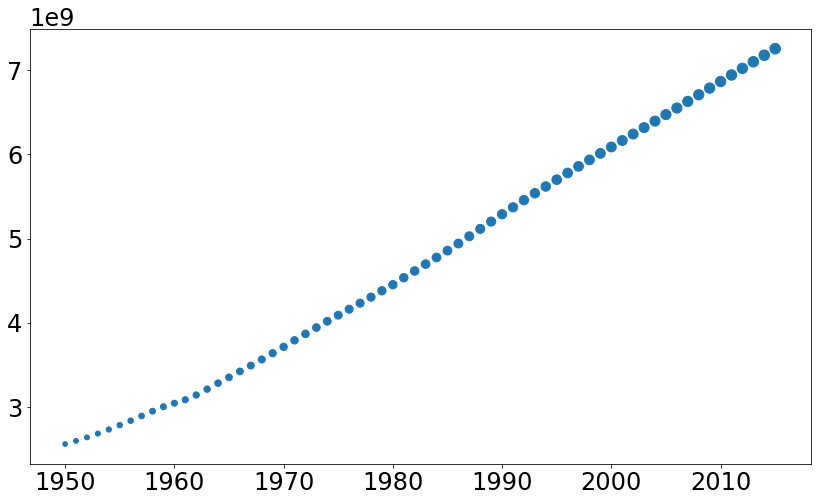

In [22]:
from datascience import Table
populations_table = Table.read_table('https://raw.githubusercontent.com/cu-applied-math/stem-camp-notebooks/master/notebooks/data8/lab02/world_population.csv')

years = populations_table['Year']
pops = populations_table['Population']

plt.figure(figsize=(14, 8))
max_pop = max(pops)
from math import log10
dot_sizes = [200*(log10(pop)-9.3) for pop in pops]

plt.scatter(years, pops, s=dot_sizes)
plt.show()

### Histogram

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


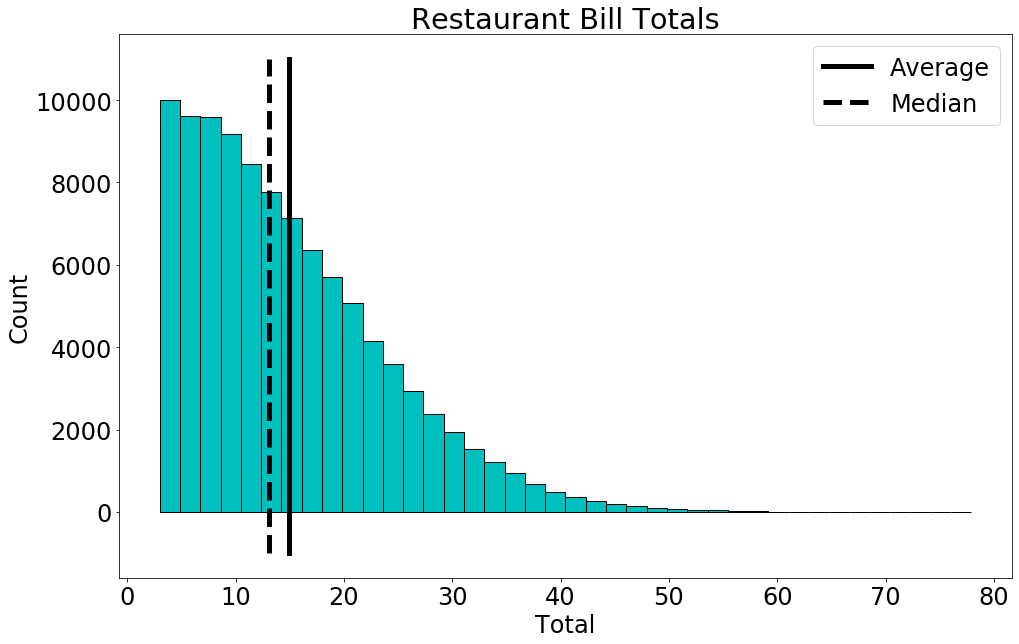

In [23]:
more_restaurant_bills = Table.read_table('https://raw.githubusercontent.com/cu-applied-math/stem-camp-notebooks/master/notebooks/data8/lab02/more_restaurant_bills.csv').column("Bill")

plt.figure(figsize=(16,10))
plt.hist(more_restaurant_bills, bins=40, color='c')

import numpy as np
average_value = np.average(more_restaurant_bills)
median_value = np.median(more_restaurant_bills)

plt.plot([average_value]*2, [-1000, 11000], 'k-', label='Average', linewidth=5)
plt.plot([median_value]*2, [-1000, 11000], 'k--', label='Median', linewidth=5)

plt.title('Restaurant Bill Totals')
plt.xlabel('Total')
plt.ylabel('Count')
plt.legend()
plt.show()